In [160]:
!pip install xgboost
!pip install lightgbm

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt



**ANALYSING THE DATA**

In [162]:
df = pd.read_csv('actions2load.csv')

In [163]:
#Check for data size
df.shape

(3242076, 5)

In [164]:
df.head()

,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s


In [165]:
df.isnull().mean()

account_id         0.000000
event_time         0.000000
event_type         0.000000
product_id         0.000000
additional_data    0.159195
dtype: float64

Text(0.5, 1.0, 'Quantifying missing data')

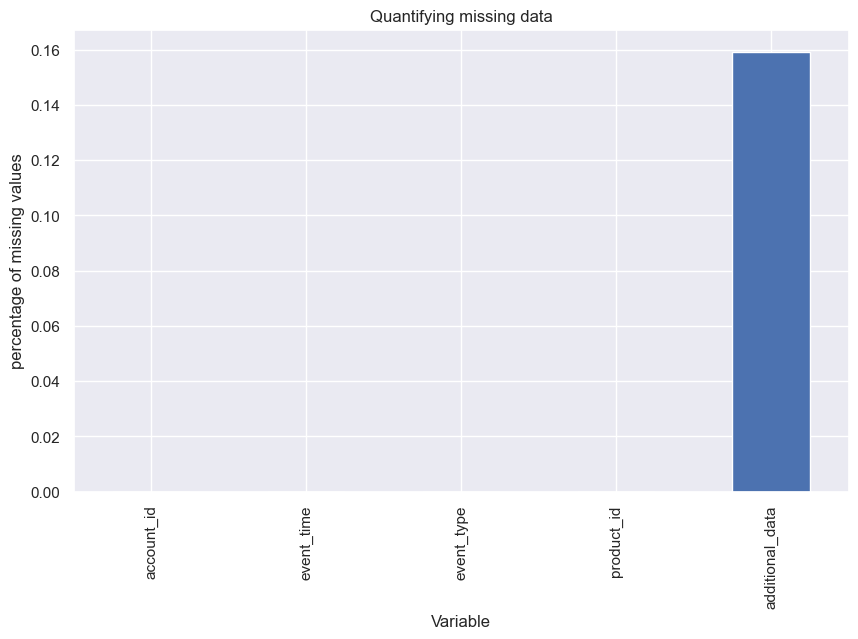

In [166]:
#bar chart showing percentage of missing vales
df.isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('percentage of missing values')
plt.xlabel('Variable')
plt.title('Quantifying missing data')

In [167]:
df.head()

,account_id,event_time,event_type,product_id,additional_data
0,608aa5969cef2edc29cb0c46deaec9da,2019-11-29 12:10:08.154,DashboardLivebookLinkOpened,1156,/book/learn-dbatools-in-a-month-of-lunches
1,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:10:19.962,ReadingOwnedBook,610,60s
2,b7d5902d66127909d0f9d766a841ebb5,2019-11-29 12:11:20.707,ReadingOwnedBook,1172,480s
3,d07263602248aa70ce1967d6f98f9506,2019-11-29 12:11:41.283,ProductTocLivebookLinkOpened,1066,/book/grokking-machine-learning/chapter-1
4,89f7601cb558e1c47b00a7fabb6a466c,2019-11-29 12:11:58.253,ReadingOwnedBook,1073,960s


In [168]:
# drop rows with missing values

df = df.drop('additional_data',axis=1)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   account_id  object
 1   event_time  object
 2   event_type  object
 3   product_id  int64 
dtypes: int64(1), object(3)
memory usage: 98.9+ MB


In [170]:
# change event_time frome object to datestamp
df['event_time']=pd.to_datetime(df['event_time'])

In [171]:
# the column additional data was dropped as it had a lot of missing data as shown on the map above
# the new data now has 4 columns
#insull is used to check completeness of the data 
df.isnull().mean()

account_id    0.0
event_time    0.0
event_type    0.0
product_id    0.0
dtype: float64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242076 entries, 0 to 3242075
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   account_id  object        
 1   event_time  datetime64[ns]
 2   event_type  object        
 3   product_id  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 98.9+ MB


In [173]:
#check for uniqueness to help understand the dataset
df.nunique()

account_id      89467
event_time    2940583
event_type         35
product_id        740
dtype: int64

In [174]:
# the column additional data was dropped as it had a lot of missing data as shown on the map above
# the new data now has the following rows and columns

df.shape

(3242076, 4)

**ANALYSISING ACCOUNT ID**

In [175]:
df['account_id']

0          608aa5969cef2edc29cb0c46deaec9da
1          d07263602248aa70ce1967d6f98f9506
2          b7d5902d66127909d0f9d766a841ebb5
3          d07263602248aa70ce1967d6f98f9506
4          89f7601cb558e1c47b00a7fabb6a466c
                         ...               
3242071    6bb61e3b7bce0931da574d19d1d82c88
3242072    6bb61e3b7bce0931da574d19d1d82c88
3242073    6bb61e3b7bce0931da574d19d1d82c88
3242074    6bb61e3b7bce0931da574d19d1d82c88
3242075    3eff5d4b55889abb0a8b08d2136f1b63
Name: account_id, Length: 3242076, dtype: object

In [176]:
#using indexing an account ID 0 was picked
df['account_id'][0]

'608aa5969cef2edc29cb0c46deaec9da'

In [177]:
# Extract the hour from the event_time column
df['hour'] = df['event_time'].dt.hour



In [178]:
# Count the number of events per hour
hourly_counts = df['hour'].value_counts().sort_index()



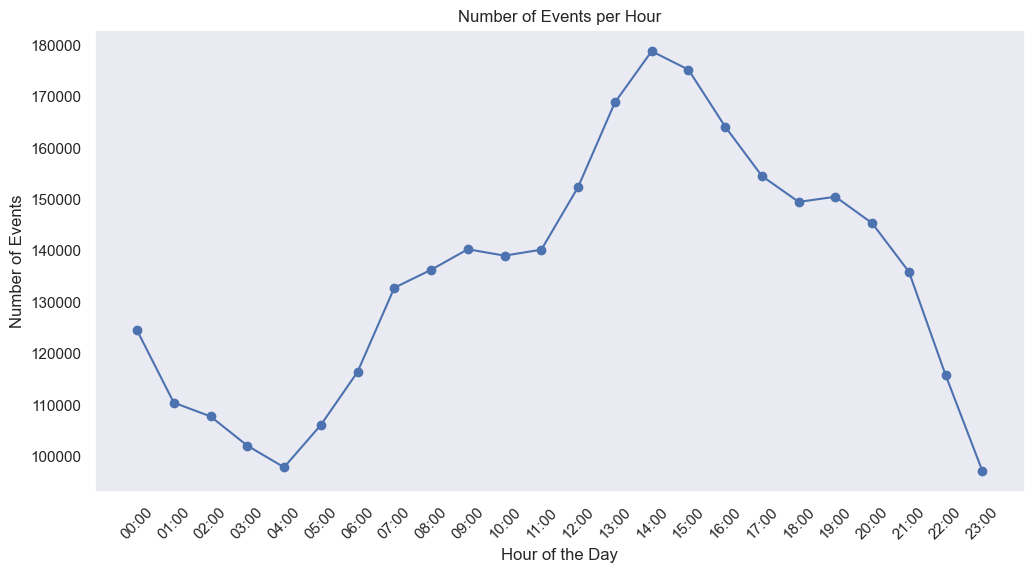

In [179]:
# Alternatively, use a line plot
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='line', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.title('Number of Events per Hour')
plt.xticks(range(24), [f'{i:02d}:00' for i in range(24)], rotation=45)
plt.grid()
plt.show()

In [180]:
#change the event time to read in hours

df['hour'] = df['event_time'].dt.hour


In [181]:
#we pick a particular account_id to analyse
# Replace 'your_account_id' with the actual account ID you want to analyze
#we call the account_id we want to analyse sam

account_id = '608aa5969cef2edc29cb0c46deaec9da' 
sam= df[df['account_id'] == account_id]

In [182]:
hourly_counts = sam.groupby('hour').size()
hourly_counts

hour
0      3
5      3
6      7
7     15
8     18
9      9
10    21
11    20
12    12
13    11
14    25
16     2
17     1
18     2
19     5
21     6
dtype: int64

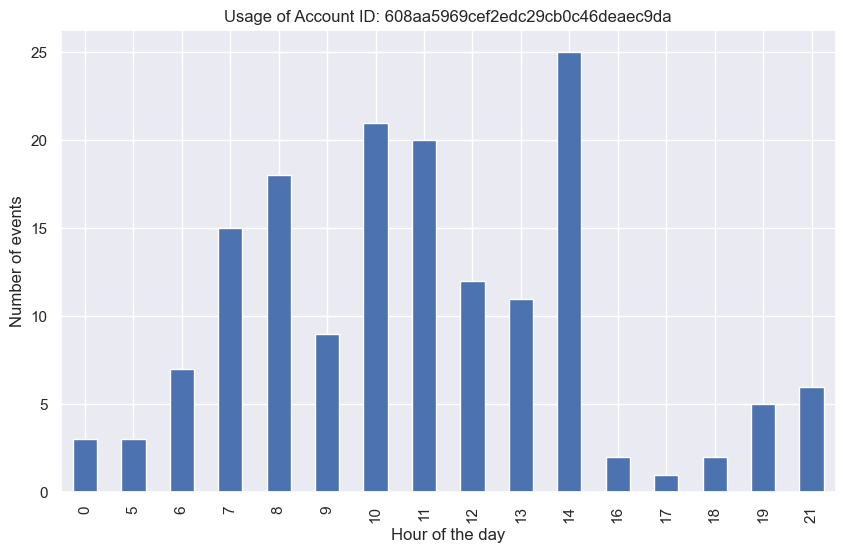

In [183]:
hourly_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hour of the day')
plt.ylabel('Number of events')
plt.title('Usage of Account ID: {}'.format(account_id))
plt.show()


In [184]:
df.isnull().sum()

account_id    0
event_time    0
event_type    0
product_id    0
hour          0
dtype: int64

In [185]:
#calculating outliers in the event_time column


# Calculate the interquartile range (IQR) of hourly event counts
Q1 = hourly_counts.quantile(0.25)
Q3 = hourly_counts.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries (1.5 * IQR below Q1 and 1.5 * IQR above Q3)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = hourly_counts[(hourly_counts < lower_bound) | (hourly_counts > upper_bound)]
print("Outliers:",outliers)


Outliers: Series([], dtype: int64)


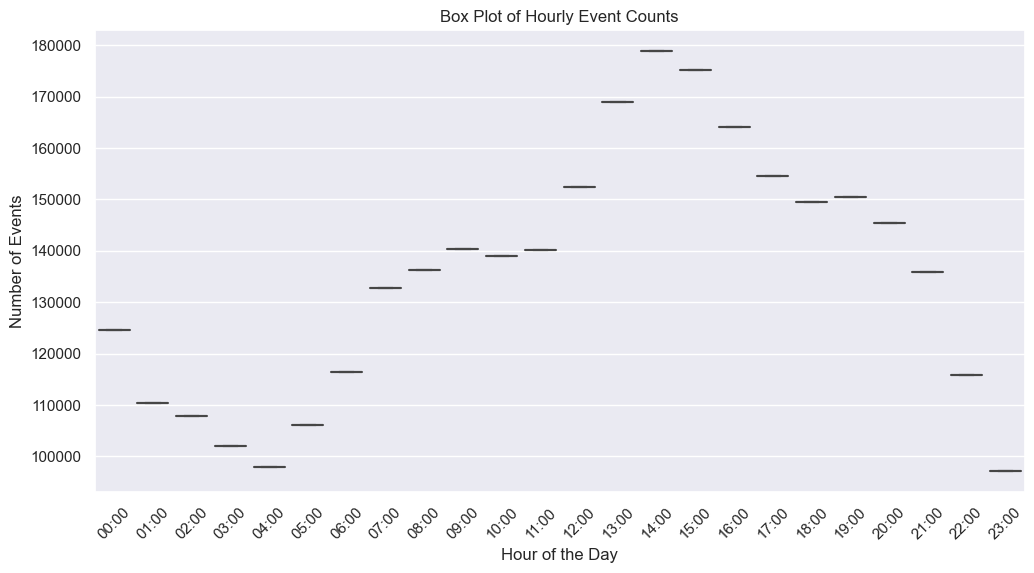

In [186]:
# Create a box plot of the hourly event counts

# Ensure the event_time column is a datetime object
df['event_time'] = pd.to_datetime(df['event_time'])

# Extract the hour from the event_time column
df['hour'] = df['event_time'].dt.hour

# Count the number of events per hour
hourly_counts = df.groupby('hour')['event_time'].count().reset_index()
hourly_counts.columns = ['hour', 'count']

plt.figure(figsize=(12, 6))
sns.boxplot(data=hourly_counts, x='hour', y='count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.title('Box Plot of Hourly Event Counts')
plt.xticks(range(24), [f'{i:02d}:00' for i in range(24)], rotation=45)
plt.show()

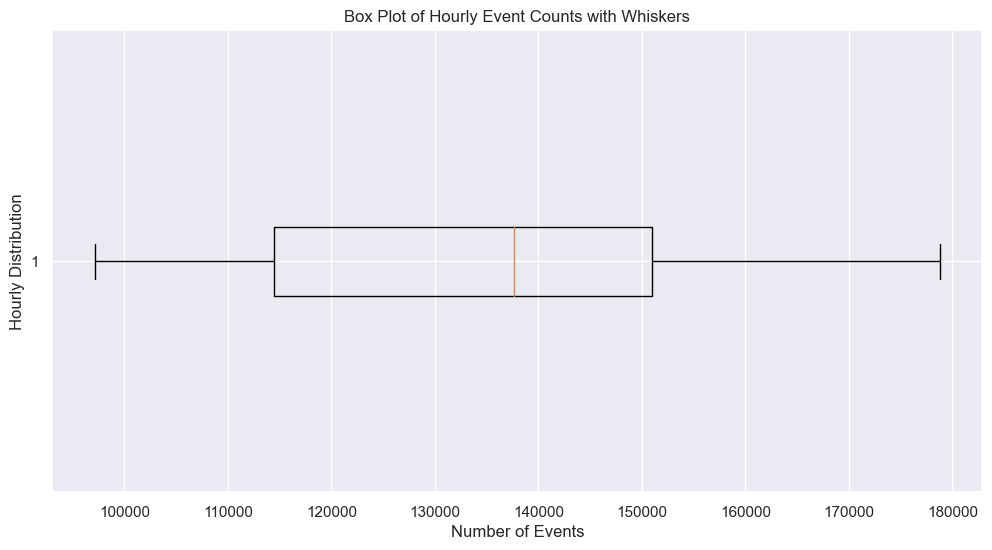

In [92]:

# Count the number of events per hour
hourly_counts = df.groupby('hour')['event_time'].count().reset_index()
hourly_counts.columns = ['hour', 'count']

# Create a box plot of the hourly event counts using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(hourly_counts['count'], vert=False)
ax.set_xlabel('Number of Events')
ax.set_ylabel('Hourly Distribution')
ax.set_title('Box Plot of Hourly Event Counts with Whiskers')
plt.show()

In [101]:
# counting frequency of events that happen less than 1% of the time
# Frequency-based outlier detection example
column = 'event_type'
threshold = 0.01  # Set a threshold to identify categories with frequency below 1%

# Calculate category frequencies
category_counts = df[column].value_counts(normalize=True)

# Identify categories with frequency below the threshold
outliers =(category_counts[category_counts < threshold]).sort_values()
print("Outliers:",outliers)

Outliers: CommentCreated                         3.084443e-07
UnknownOriginLivebookLinkOpened        9.253330e-07
SherlockHolmesClueFound                3.084443e-06
ProductSeeFreeLinkOpened               5.027643e-05
ProductLiveaudioUpsell                 2.584764e-04
AddOrUpdateCoupon                      3.938834e-04
RemoveProductOffering                  6.671651e-04
ShareableLinkOpened                    7.362566e-04
ShareableLinkCreated                   8.469882e-04
GoToManningShoppingCart                1.421312e-03
UpvoteGiven                            1.485160e-03
NoteCreated                            1.598050e-03
AddProductOffering                     2.008281e-03
OrderConfirmationLivebookLinkOpened    2.078606e-03
ExerciseSolved                         2.150166e-03
LivebookAccountConfirmation            2.254420e-03
LivebookRegistration                   2.375638e-03
EBookRegistration                      2.727265e-03
BookmarkCreated                        3.362043e-03
Pr

In [100]:
#this shows how the column shows in real life
df[column].value_counts()

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

C:\Users\mfona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


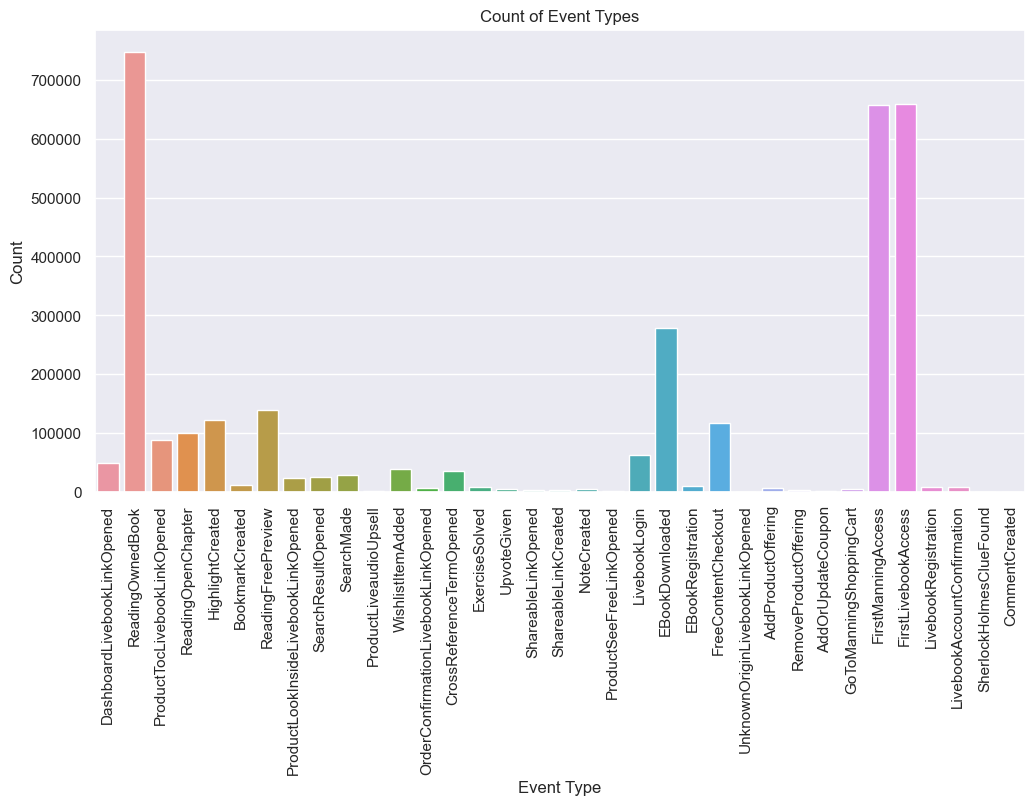

In [106]:
#ploting event_type based on frequency 

plt.figure(figsize=(12, 6))  # Increase the figure size
ax = sns.countplot(df['event_type'])
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Count of Event Types')
plt.show()

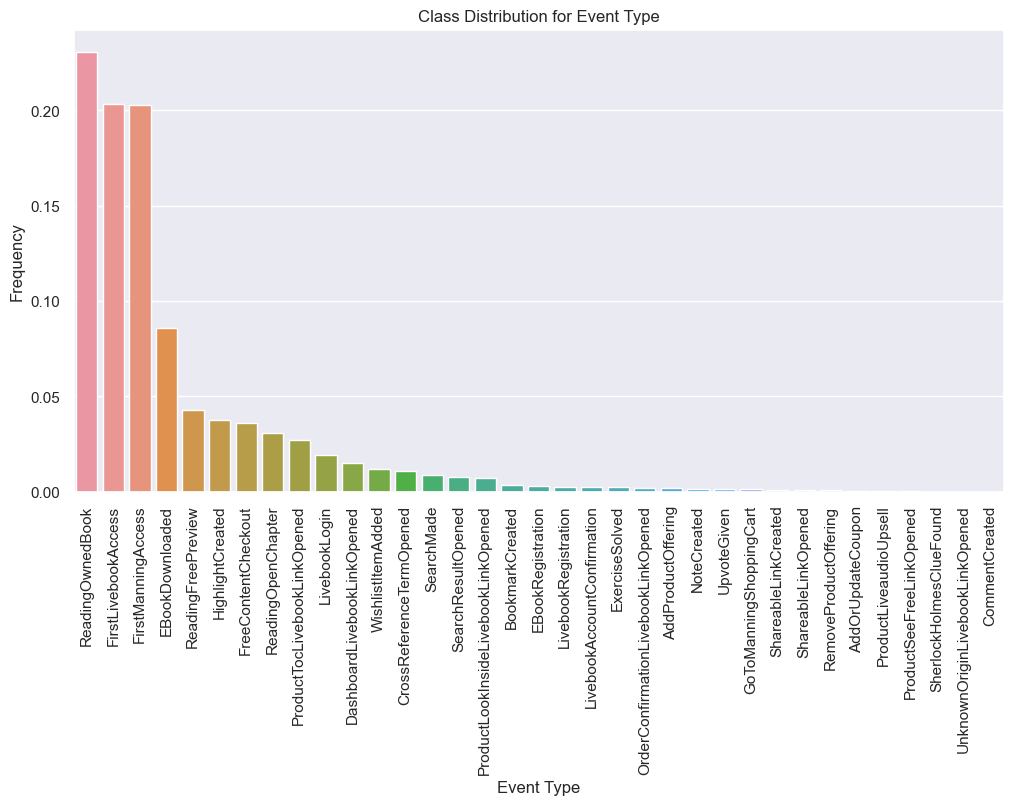

In [108]:
#  Checking for Class Imbalance

# Calculate the frequencies of each category in the event_type column
category_counts = df['event_type'].value_counts(normalize=True)

# Convert the frequencies to a DataFrame
category_counts_df = pd.DataFrame(category_counts).reset_index()
category_counts_df.columns = ['event_type', 'frequency']

# Plot the frequencies using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='event_type', y='frequency', data=category_counts_df)
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.title('Class Distribution for Event Type')
plt.show()

Imbalance incategorical can be corrected by using techniques such as oversampling, undersampling, or using a combination of both. Here's a brief overview of each method:

    Oversampling: This involves increasing the number of samples for the minority class (less frequent categories) by duplicating them or generating synthetic samples. One common method is the Synthetic Minority Over-sampling Technique (SMOTE) for numerical data, but for categorical data, you can simply duplicate the samples.

    Undersampling: This involves reducing the number of samples for the majority class (more frequent categories) by randomly selecting a subset of samples. This method can lead to a loss of information, so it should be used with caution.

    Combination of oversampling and undersampling: You can combine both techniques by oversampling the minority class and undersampling the majority class to create a balanced dataset.



In [111]:
# Correcting the data imbalance using a combination of oversampling and undersampling:

from sklearn.utils import resample

# Calculate the number of samples for each class to achieve a balanced dataset
target_samples = df['event_type'].value_counts().median()

# Create an empty DataFrame to store the balanced data
balanced_df = pd.DataFrame()

for event_type in df['event_type'].unique():
    event_data = df[df['event_type'] == event_type]
    
    if len(event_data) < target_samples:
        # Oversample minority class
        event_data = resample(event_data, replace=True, n_samples=int(target_samples), random_state=42)
    else:
        # Undersample majority class
        event_data = event_data.sample(n=int(target_samples), random_state=42)
    
    balanced_df = pd.concat([balanced_df, event_data])

# Shuffle the balanced data
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

visualize the balanced event_type column in the balanced_df DataFrame using a bar plot, similar to what we did previously for checking class imbalance. Here's how to do it:

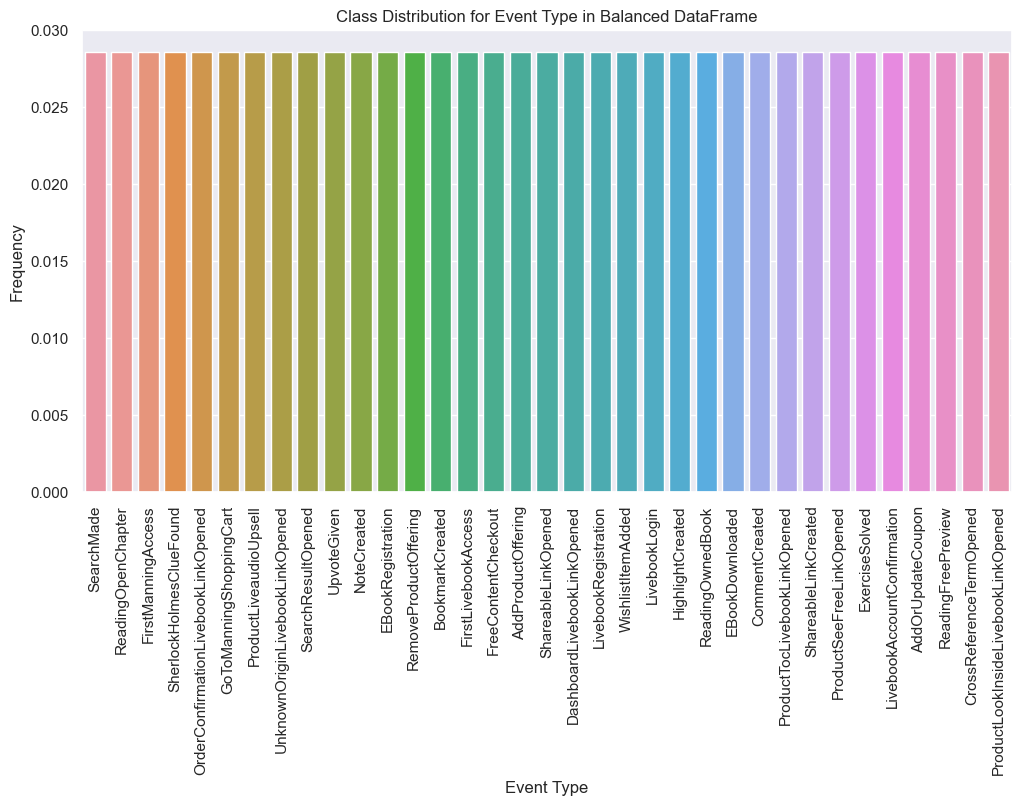

In [112]:
# Calculate the frequencies of each category in the balanced event_type column
category_counts = balanced_df['event_type'].value_counts(normalize=True)

# Convert the frequencies to a DataFrame
category_counts_df = pd.DataFrame(category_counts).reset_index()
category_counts_df.columns = ['event_type', 'frequency']

# Plot the frequencies using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='event_type', y='frequency', data=category_counts_df)
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.title('Class Distribution for Event Type in Balanced DataFrame')
plt.show()